In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers


In [2]:
dataset = pd.read_csv(r'D:\Projects\NLP\train.csv',engine ='python',encoding ='utf8',error_bad_lines=False)

Skipping line 46111: unexpected end of data


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46109 entries, 0 to 46108
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             46109 non-null  object
 1   comment_text   46109 non-null  object
 2   toxic          46109 non-null  int64 
 3   severe_toxic   46109 non-null  int64 
 4   obscene        46109 non-null  int64 
 5   threat         46109 non-null  int64 
 6   insult         46109 non-null  int64 
 7   identity_hate  46109 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 2.8+ MB


In [4]:
comments = dataset.iloc[:,1].values

In [5]:
toxic_label = dataset.iloc[:,2].values

In [6]:
training_size = 35000
vocab_size = 1000
max_length = 10

In [7]:
train_com = comments[0:training_size]
test_com = comments [training_size:]
train_label = toxic_label[0:training_size]
test_label = toxic_label[training_size:]

In [8]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(train_com)

In [9]:
word_index = tokenizer.word_index

In [10]:
train_com = tokenizer.texts_to_sequences(train_com)
train_pad = pad_sequences(train_com, maxlen=max_length, padding='post', truncating='post')

In [11]:
test_com = tokenizer.texts_to_sequences(test_com)
test_pad = pad_sequences(test_com, maxlen=max_length, padding='post', truncating='post')

In [12]:
train_pad = np.array(train_pad)
train_label = np.array(train_label)
test_pad = np.array(test_pad)
test_label = np.array(test_label)

In [48]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size,5, input_length=max_length),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv1D(64, 5, activation='relu', kernel_regularizer = regularizers.l2(0.01) ),
    tf.keras.layers.MaxPooling1D(pool_size=4),
    tf.keras.layers.LSTM(32, kernel_regularizer = regularizers.l2(0.01)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
    
])

callback =EarlyStopping(monitor='val_accuracy', patience=4)
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [49]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, 10, 5)             5000      
_________________________________________________________________
dropout_18 (Dropout)         (None, 10, 5)             0         
_________________________________________________________________
conv1d_9 (Conv1D)            (None, 6, 64)             1664      
_________________________________________________________________
max_pooling1d_9 (MaxPooling1 (None, 1, 64)             0         
_________________________________________________________________
lstm_9 (LSTM)                (None, 32)                12416     
_________________________________________________________________
dropout_19 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 1)                

In [50]:
num_epochs = 15
history = model.fit(train_pad, train_label, epochs=num_epochs, validation_data=(test_pad, test_label), verbose=2,batch_size=32,callbacks=[callback])

Epoch 1/15
1094/1094 - 5s - loss: 0.4008 - accuracy: 0.9018 - val_loss: 0.3279 - val_accuracy: 0.8992
Epoch 2/15
1094/1094 - 5s - loss: 0.3210 - accuracy: 0.9020 - val_loss: 0.3097 - val_accuracy: 0.8992
Epoch 3/15
1094/1094 - 5s - loss: 0.2816 - accuracy: 0.9113 - val_loss: 0.2656 - val_accuracy: 0.9153
Epoch 4/15
1094/1094 - 5s - loss: 0.2541 - accuracy: 0.9213 - val_loss: 0.2486 - val_accuracy: 0.9216
Epoch 5/15
1094/1094 - 5s - loss: 0.2399 - accuracy: 0.9254 - val_loss: 0.2422 - val_accuracy: 0.9235
Epoch 6/15
1094/1094 - 5s - loss: 0.2337 - accuracy: 0.9272 - val_loss: 0.2355 - val_accuracy: 0.9257
Epoch 7/15
1094/1094 - 5s - loss: 0.2274 - accuracy: 0.9277 - val_loss: 0.2332 - val_accuracy: 0.9266
Epoch 8/15
1094/1094 - 5s - loss: 0.2228 - accuracy: 0.9293 - val_loss: 0.2316 - val_accuracy: 0.9268
Epoch 9/15
1094/1094 - 5s - loss: 0.2205 - accuracy: 0.9291 - val_loss: 0.2310 - val_accuracy: 0.9274
Epoch 10/15
1094/1094 - 5s - loss: 0.2184 - accuracy: 0.9293 - val_loss: 0.2294 - 

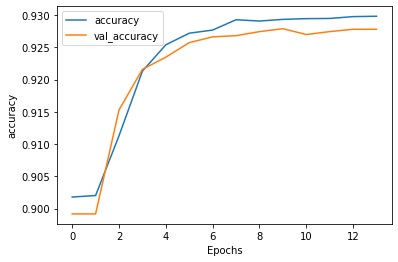

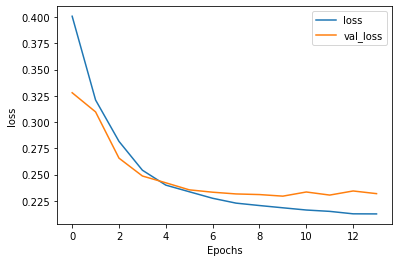

In [51]:
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")